## Import necessary packages

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.feature_selection

In [10]:
sns.set_theme(style= "dark")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In this notebook new approachesare taken different form github but while modeeling even preprocessing like github is considered

In [4]:
df=pd.read_excel("C:/Users/jatin/OneDrive/Desktop/jstin/doi_10.5061_dryad.5hqbzkh6f__v6/SurveyResults.xlsx")

In [12]:
a=np.array(df["ID"])
d={}
for i in range(len(a)):
    if(a[i] not in d):
        d[a[i]]=0
    else:
        d[a[i]]+=1
print(sorted(d.items(),key=lambda x:x[1]))


[('6D', 3), ('7E', 6), ('EG', 10), ('5C', 14), ('8B', 16), ('CE', 19), ('DF', 20), ('6B', 22), ('BG', 24), ('F5', 25), (15, 29), (83, 29), ('E4', 39), (94, 42), ('7A', 45)]


## Pre process, clean,summarize data

In [3]:
df=pd.read_csv("C:/Users/jatin/OneDrive/Desktop/merged_data_labeled.csv")

In [4]:
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.000000000,1.0
1,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.031249920,1.0
2,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.062500096,1.0
3,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.093750016,1.0
4,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.124999936,1.0


In [5]:
df.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,3.913631e+06,3.913631e+06,3.913631e+06,3.913631e+06,3.913631e+06,3.913631e+06,3.913631e+06
mean,-3.428724e+01,-2.632439e+00,2.313430e+01,2.860837e+00,8.705850e+01,3.145194e+01,1.271781e+00
std,2.617428e+01,3.339914e+01,3.162951e+01,5.045804e+00,1.336124e+01,2.433321e+00,8.667815e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,-5.500000e+01,-2.100000e+01,2.000000e+00,3.292030e-01,7.755000e+01,2.929000e+01,0.000000e+00
50%,-3.800000e+01,2.000000e+00,2.400000e+01,8.188110e-01,8.523000e+01,3.115000e+01,2.000000e+00
75%,-2.000000e+01,1.500000e+01,4.700000e+01,2.965106e+00,9.422000e+01,3.341000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,4.458383e+01,1.635000e+02,3.659000e+01,2.000000e+00


##### The data mainly has lowest std on heart rate

In [6]:
df.nunique()

X               256
Y               256
Z               256
EDA           84114
HR             5028
TEMP            599
id                5
datetime    3700503
label             3
dtype: int64

#### Temp has the lowest uunique values apart from orientation

In [7]:
df.isna().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

#### No NAN values present

## Exploratory data Analysis

### Heart rate follows a bell curve

[[]]

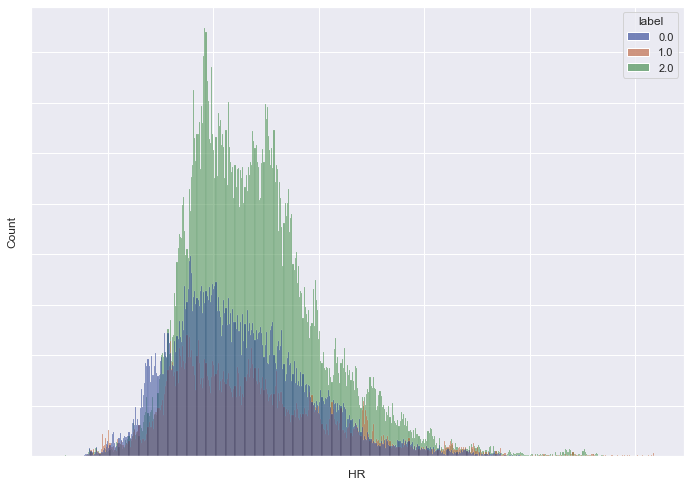

In [11]:
g1=sns.histplot(data=df,x="HR",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

[[]]

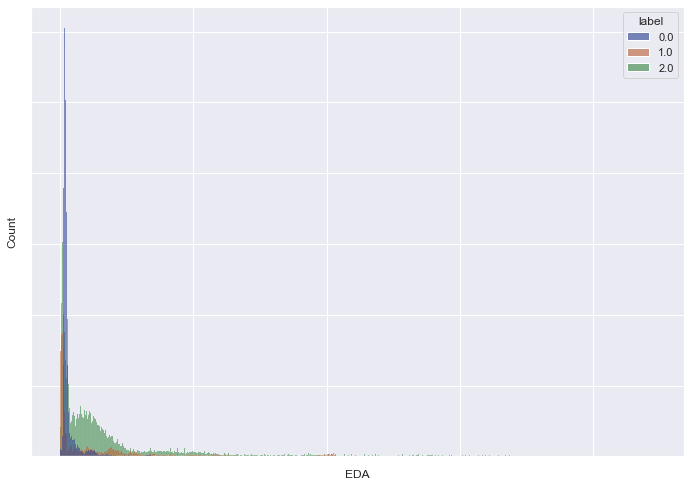

In [12]:
g1=sns.histplot(data=df,x="EDA",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

### EDA values are centralized on a single value

[[]]

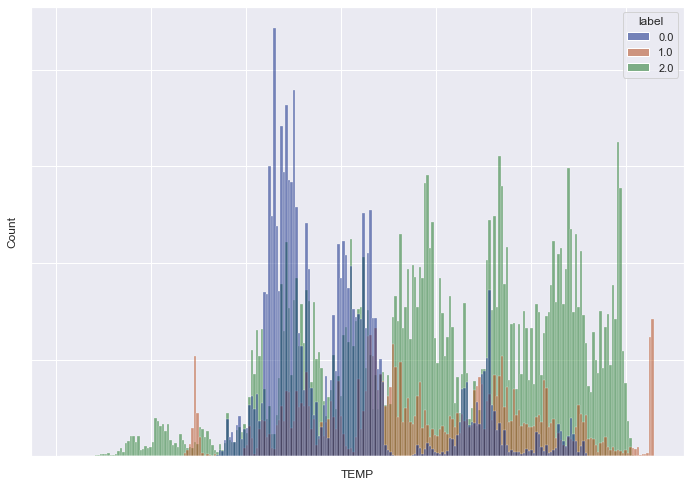

In [13]:
g1=sns.histplot(data=df,x="TEMP",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

### Temparature is distributed on a smaller range

[[]]

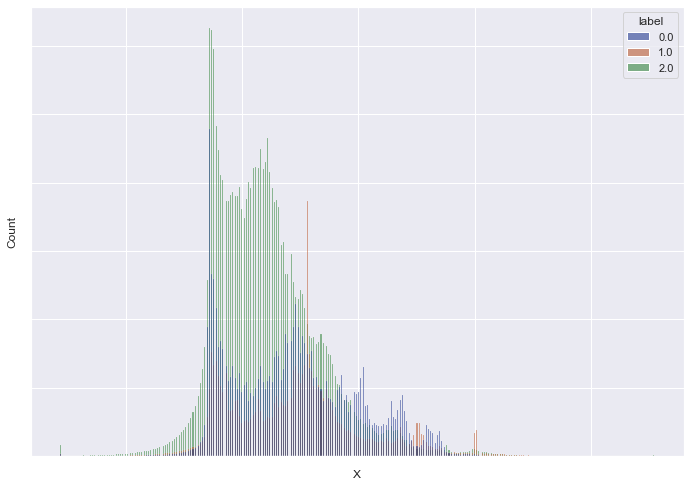

In [14]:
g1=sns.histplot(data=df,x="X",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

[[]]

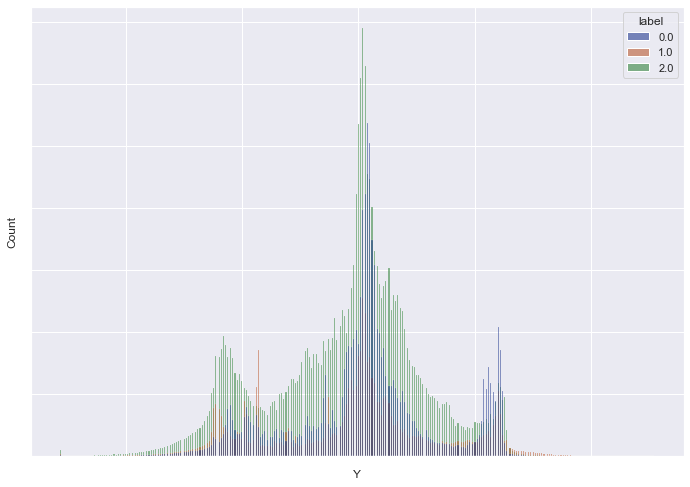

In [15]:
g1=sns.histplot(data=df,x="Y",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

[[]]

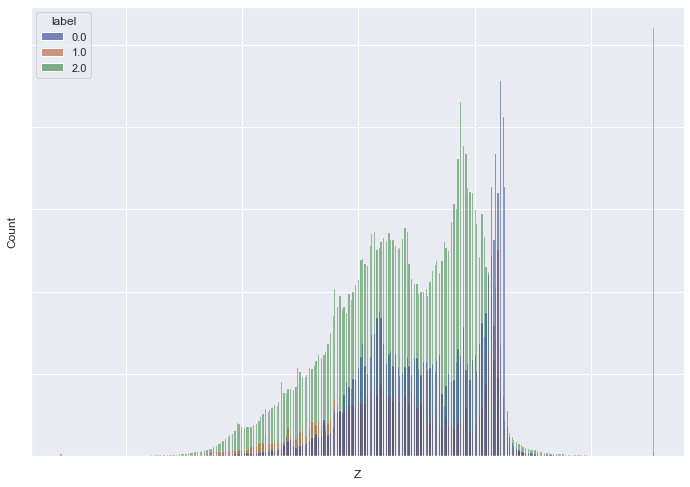

In [16]:
g1=sns.histplot(data=df,x="Z",hue="label",palette="dark")
g1.set(xticklabels=[])
g1.set(yticklabels=[])

Looks like much information is not being transmitted from x,y,z

## While performing modelling we can use many feature selectionmethods like Recursive feature elimination to choose effectively all the features but lets perform PCA to bettr understand the features

In [94]:
df1=df

In [96]:
df1=df1.drop(["id","datetime","label"],axis=1)

In [97]:
n=np.array(df1)

In [99]:
pca=sk.decomposition.PCA()

In [100]:
pca.fit(n)

PCA()

In [101]:
print(pca.explained_variance_ratio_)

[0.39379707 0.35180726 0.18567169 0.05859564 0.00824138 0.00188695]


In [102]:
print(pca.singular_values_)

[68120.23461932 64386.12630931 46774.8863376  26276.80469261
  9854.62241529  4715.41952812]


# The highest singular values are for temp,hr

# lets look at pearson coefficient

In [107]:
x=np.array(df.drop(["id","datetime","label"],axis=1))

In [108]:
y=np.array(df["label"])

In [111]:
sk.feature_selection.r_regression(x,y)

array([-0.20734308, -0.10726012, -0.18653889,  0.26246622,  0.09784287,
        0.3640187 ])

# this shows highest correlation with hr,eda,x

# Considering above results if required more features can eb generated as shown in the source github and similar analysis can be performed